# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

**1. Загрузить датасет**

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [2]:
credit = pd.read_csv("creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [4]:
#Нам очень повезло - отсутсвующих значений в датасете не обнаружено
credit.isnull().sum().sum()

0

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

Class
0    284315
1       492
Name: Amount, dtype: int64

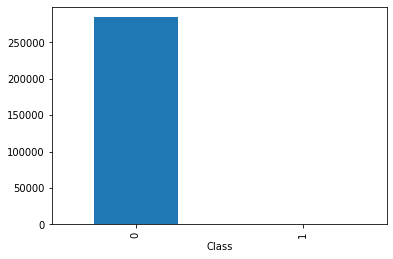

In [4]:
#Классы явно не сбалансированы
credit_compare = credit.reset_index().groupby(['Class']).count()["Amount"]
credit_compare.plot(kind='bar', stacked=True)
credit_compare

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

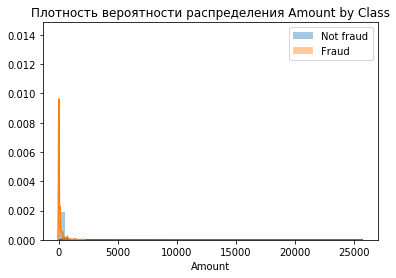

In [5]:
cr_not_fraud = credit[credit['Class']==0]['Amount']
cr_fraud = credit[credit['Class']==1]['Amount']

sns.distplot(cr_not_fraud)
sns.distplot(cr_fraud)
plt.title('Плотность вероятности распределения Amount by Class')
plt.legend(['Not fraud', 'Fraud'])
plt.show()

__Вывод__: гистограмма говорит, что большая часть мошеннеческих операцияй касалась небольшого значения Amount.

**5. Построить графики histograms для всех значений**

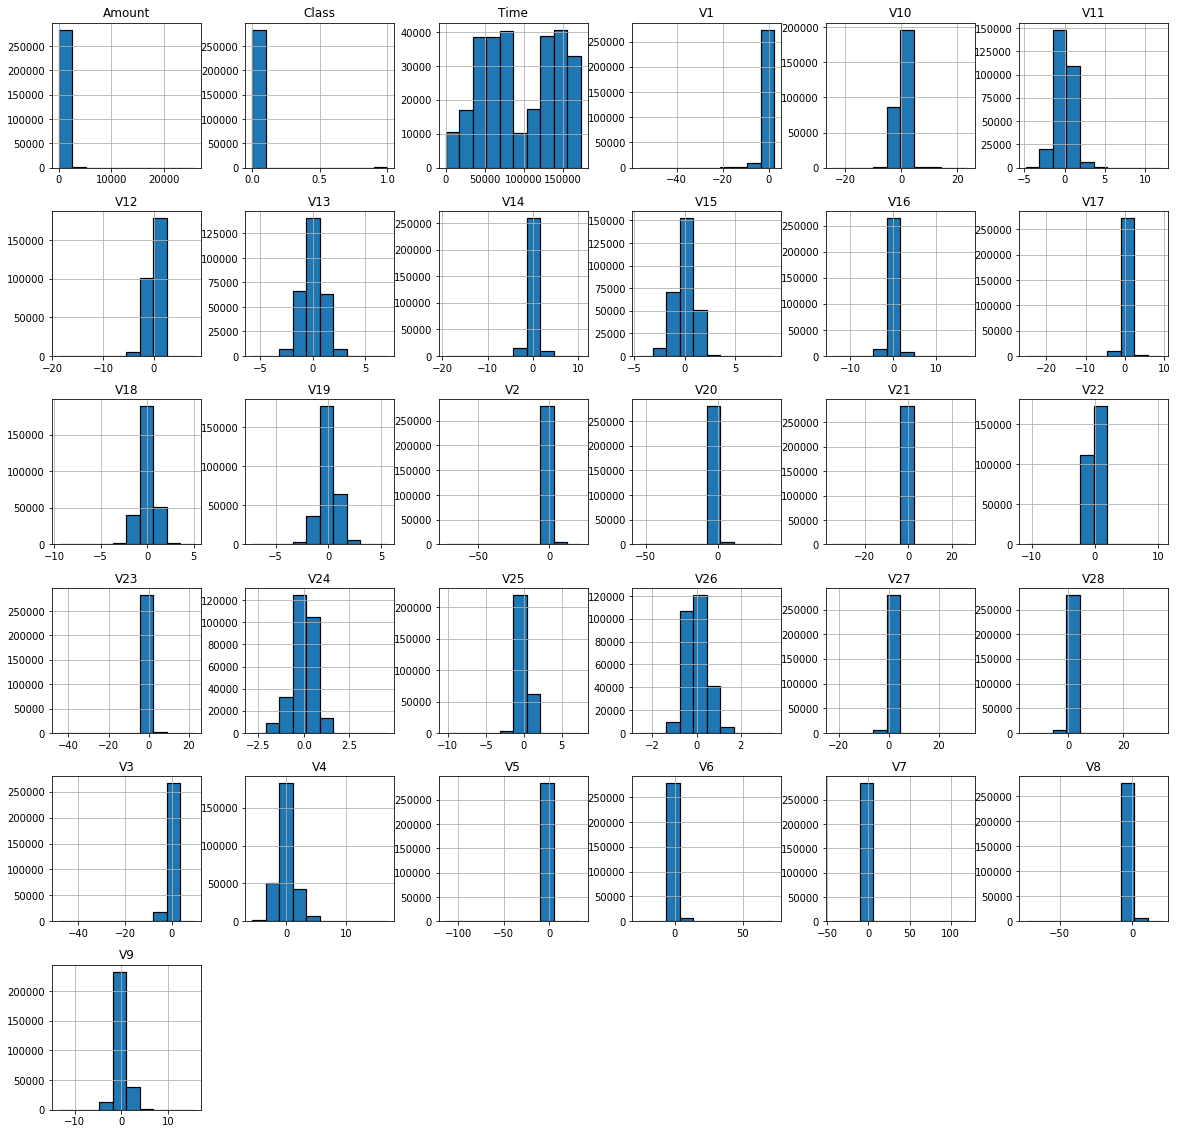

In [53]:
credit.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

**6. Построить матрицу корреляций для всех значений**

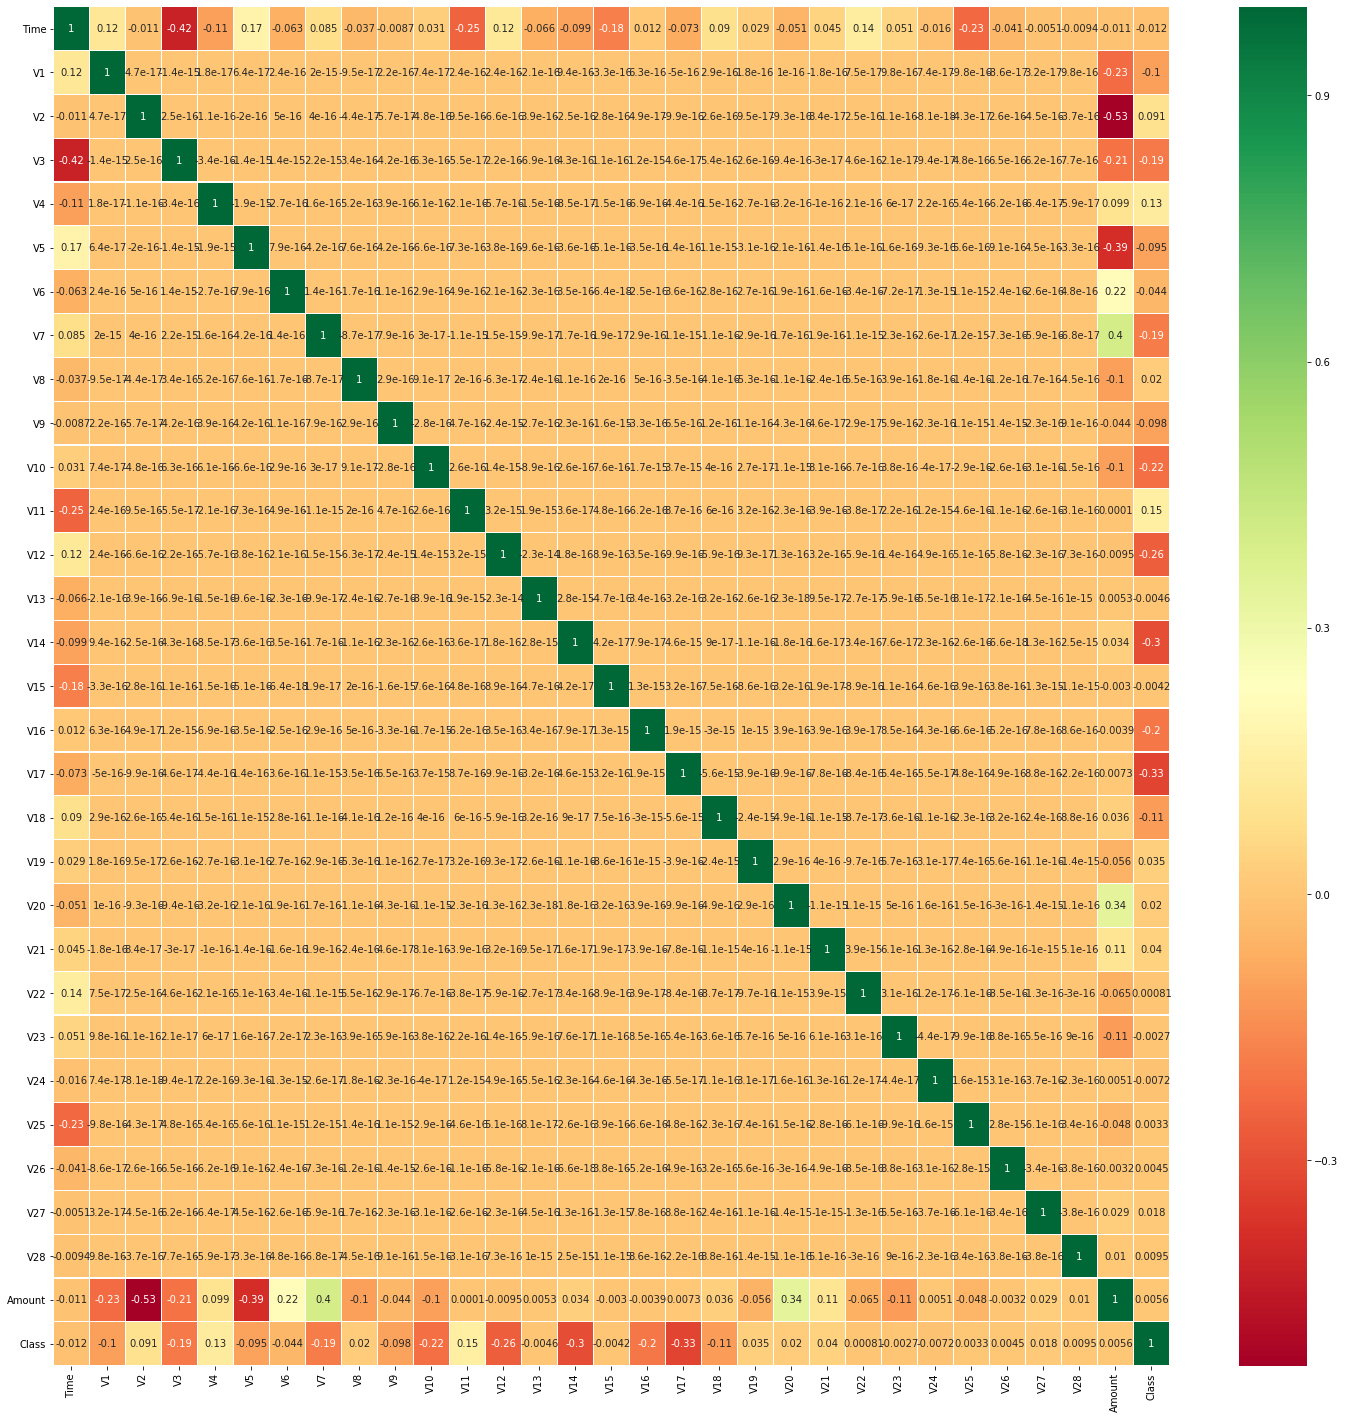

In [18]:
sns.heatmap(credit.corr(),yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [8]:
#Определяем корреляции. В нашем случае все корреляции довольно слабые, возьмем в качестве границы 0,2
corr_matrix = credit.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.2)]
print(to_drop)

['V3', 'V11', 'V25', 'Amount', 'Class']


In [9]:
credit_new = credit[to_drop]
credit_new.head()

,V3,V11,V25,Amount,Class
0,2.536347,-0.551600,0.128539,149.62,0
1,0.166480,1.612727,0.167170,2.69,0
2,1.773209,0.624501,-0.327642,378.66,0
3,1.792993,-0.226487,0.647376,123.50,0
4,1.548718,-0.822843,-0.206010,69.99,0


In [87]:
#Кросс-валидация
output_y = credit_new['Class']
output_y = np.array(output_y)
input_x = credit_new.drop('Class', axis=1)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2)

In [89]:
#Всё-таки логистическая регрессия, так как это задача классификации
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели:  0.9989115550718023


In [94]:
X_test['real']=y_test
X_test['predict']=predicted_classes
X_test.head()

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,V3,V11,V25,Amount,predict,real
230535,-2.420758,-0.381737,0.349210,44.99,0,0
10046,-5.363984,1.625795,0.103291,1.79,0,0
232654,0.595445,-1.196694,1.198193,158.00,0,0
188761,-0.612956,0.378644,-0.183748,5.99,0,0
187943,-0.482735,0.056656,-0.238082,20.00,0,0


In [95]:
import sklearn
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(X_test['real'], X_test['predict']).ravel()
sklearn.metrics.confusion_matrix(X_test['real'], X_test['predict'])

array([[56873,     7],
       [   55,    27]], dtype=int64)

In [96]:
print(f'Accuracy = {round((tp + tn) / (tp + fp + tn + fn), 2)},\nPrecision = {round((tp) / (tp + fp), 2)},\nRecall = {round((tp) / (tp + fn), 2)},\nSensitivity = {round((tp) / (tp + fn), 2)},\nSpecificity = {round((tn) / (tn + fp), 2)}\n')

Accuracy = 1.0,
Precision = 0.79,
Recall = 0.33,
Sensitivity = 0.33,
Specificity = 1.0



__Вывод__: по полученным метрикам качествам, в первом приближении, можно заключить, что качество модели хорешее (см. Accuracy). Но, к сожалению, это не совсем так. Высокий Accuracy достигается за счёт несбалансированных классов, в нашем случае почти все сделки с классом 0. А мы хотим прогнозировать 1, поэтому для нас более наглядны такие метрики, как Precision и Recall. Precision - тоже довольно хороший, он говорит, что из всех, кого мы определили, как 1, действительно 79% являются 1, но у нас низкий Recall, который говорит, что из всех мошенников, мы выявили только 33%.

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [6]:
#Минимальное значение класса
m = min(credit_compare)

import random
ls = []
for x in range(m):
    ls.append(random.randint(0,m))

In [10]:
credit_new_balance = credit_new
credit_new_balance_one = credit_new_balance[credit_new_balance['Class']==1]
credit_new_balance_zero =  credit_new_balance[credit_new_balance['Class']==0]
credit_new_balance_zero = credit_new_balance_zero.iloc[ls]

credit_new_balance = pd.concat([credit_new_balance_zero, credit_new_balance_one])
credit_new_balance.head()

,V3,V11,V25,Amount,Class
345,2.507513,0.316424,0.328379,13.53,0
27,0.434555,-0.641506,0.559639,16.00,0
303,0.696628,-1.599973,0.570793,12.99,0
109,0.086472,-1.089323,0.817360,1.00,0
303,0.696628,-1.599973,0.570793,12.99,0


Class
0    492
1    492
Name: Amount, dtype: int64

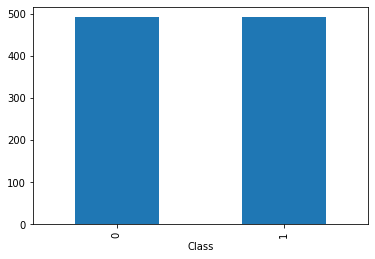

In [140]:
#Результаты балансировки
credit_compare_b = credit_new_balance.groupby(['Class']).count()["Amount"]
credit_compare_b.plot(kind='bar', stacked=True)
credit_compare_b

In [145]:
#Кросс-валидация
output_y = credit_new_balance['Class']
output_y = np.array(output_y)
input_x = credit_new_balance.drop('Class', axis=1)

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2)

In [147]:
#Всё-таки логистическая регрессия, так как это задача классификации
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

Точность предсказания модели:  0.934010152284264


C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [148]:
X_test['real']=y_test
X_test['predict']=predicted_classes
X_test.head()

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,V3,V11,V25,Amount,real,predict
248971,-3.522024,2.214000,0.349212,0.76,1,1
154633,-4.490937,4.287021,0.412166,22.04,1,1
251866,-4.722363,2.757837,0.128449,3.90,1,1
76555,-7.885936,5.266586,-0.380687,153.46,1,1
483,0.498972,1.343920,0.601876,19.64,0,0


In [149]:
import sklearn
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(X_test['real'], X_test['predict']).ravel()
sklearn.metrics.confusion_matrix(X_test['real'], X_test['predict'])

array([[85,  4],
       [ 9, 99]], dtype=int64)

In [150]:
print(f'Accuracy = {round((tp + tn) / (tp + fp + tn + fn), 2)},\nPrecision = {round((tp) / (tp + fp), 2)},\nRecall = {round((tp) / (tp + fn), 2)},\nSensitivity = {round((tp) / (tp + fn), 2)},\nSpecificity = {round((tn) / (tn + fp), 2)}\n')

Accuracy = 0.93,
Precision = 0.96,
Recall = 0.92,
Sensitivity = 0.92,
Specificity = 0.96



__Вывод__: несмотря на падение Accuracy, мы существенно улучшили модель, об этом говорят ключевые метрики Precision и Recall, согласно которым мы выявляем практически всех мошенников и практически не отказываем честным клиентам.

**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

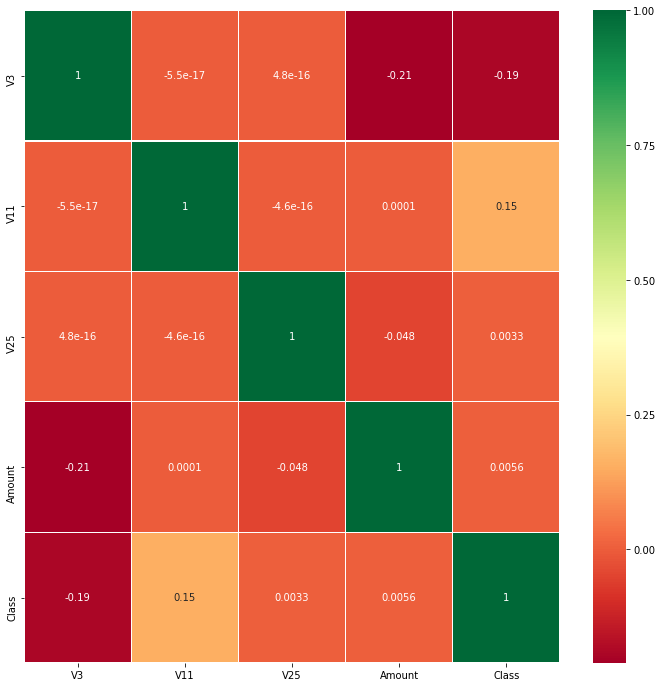

In [14]:
sns.heatmap(credit_new.corr(),yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

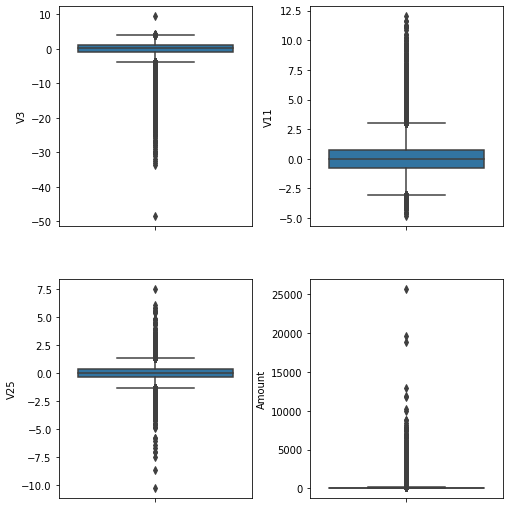

In [36]:
#Наш выбор перменных меньше, поэтому построем боксплоты для всех 4-х метрических шкал сразу
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))
index = 0
axs = axs.flatten()

for k,v in credit_new.drop('Class', axis=1).items():
    sns.boxplot(y=k, data=credit_new.drop('Class', axis=1), ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

In [39]:
#Удалим выбросы - все значения больше/меньше 1.5 IQR
def quartily(data):
    x = np.array([np.percentile(data, 25),
               np.percentile(data, 75)])
        
    return x

In [73]:
credit_new_bx=credit_new.drop('Class', axis=1)
x=[]

for i in credit_new_bx.columns:
    x.append(quartily(credit_new_bx[i]))

quart = pd.DataFrame(np.array(x).T)
quart.columns = credit_new_bx.columns
quart = quart.rename(index={0:"1q", 1:"3q"},)
quart = quart.T
quart['1.5 IQR'] = (quart['3q'] - quart['1q'])*1.5
quart['Low border'] = quart['1q'] - quart['1.5 IQR']
quart['Up border'] = quart['3q'] + quart['1.5 IQR']
quart

,1q,3q,1.5 IQR,Low border,Up border
V3,-0.890365,1.027196,2.876341,-3.766705,3.903536
V11,-0.762494,0.739593,2.253131,-3.015626,2.992725
V25,-0.317145,0.350716,1.001791,-1.318936,1.352506
Amount,5.600000,77.165000,107.347500,-101.747500,184.512500


In [103]:
credit_new_slice = credit_new[(credit_new['V3']>=quart['Low border']['V3']) & (credit_new['V3']<=quart['Up border']['V3']) & 
                              (credit_new['V11']>=quart['Low border']['V11']) & (credit_new['V11']<=quart['Up border']['V11']) &
                             (credit_new['V25']>=quart['Low border']['V25']) & (credit_new['V25']<=quart['Up border']['V25']) &
                             (credit_new['Amount']>=quart['Low border']['Amount']) & (credit_new['Amount']<=quart['Up border']['Amount']) ]


246342

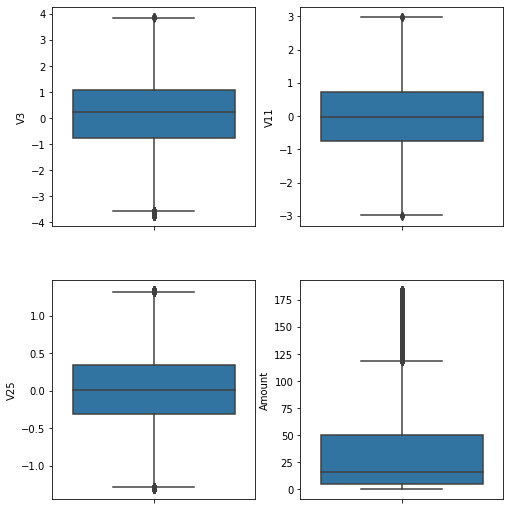

In [104]:
#Большая часть выбросов была удалена (можно ещё раз высчитать 1.5 IQR на новом датасете и убрать все окончательно,
#но остановимся на этом результате)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))
index = 0
axs = axs.flatten()

for k,v in credit_new_slice.drop('Class', axis=1).items():
    sns.boxplot(y=k, data=credit_new_slice.drop('Class', axis=1), ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [106]:
#Кросс-валидация
output_y = credit_new_slice['Class']
output_y = np.array(output_y)
input_x = credit_new_slice.drop('Class', axis=1)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2)

In [108]:
#Всё-таки логистическая регрессия, так как это задача классификации
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели:  0.9995128782804603


In [109]:
X_test['real']=y_test
X_test['predict']=predicted_classes
X_test.head()

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,V3,V11,V25,Amount,real,predict
275217,-1.323649,-1.465668,0.021785,54.45,0,0
112395,-0.114499,-0.127087,0.581150,148.19,0,0
1937,0.381993,1.561124,0.108923,0.99,0,0
239534,0.735246,0.589239,0.463004,4.49,0,0
98666,1.492789,0.057741,0.063853,5.10,0,0


In [110]:
import sklearn
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(X_test['real'], X_test['predict']).ravel()
sklearn.metrics.confusion_matrix(X_test['real'], X_test['predict'])

array([[49245,     0],
       [   24,     0]], dtype=int64)

In [111]:
print(f'Accuracy = {round((tp + tn) / (tp + fp + tn + fn), 2)},\nPrecision = {round((tp) / (tp + fp), 2)},\nRecall = {round((tp) / (tp + fn), 2)},\nSensitivity = {round((tp) / (tp + fn), 2)},\nSpecificity = {round((tn) / (tn + fp), 2)}\n')

Accuracy = 1.0,
Precision = nan,
Recall = 0.0,
Sensitivity = 0.0,
Specificity = 1.0



C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


__Вывод__: модель получилась очень плохая и, как и всегда, Accuracy не должен вводить в заблуждение. Вероятно, удалив выбросы мы потеряли большую часть меток 1, в итоге наша модель плохо обучилась. К классу 1 не был отнесён не один элемент, Precision = 0. Это говорит о том, что наша модель не способна определять мошенников. Следовательно ценность её равна 0.